In [ ]:
!pip install mne
!pip install PyIF
!pip install nose
import nose
import mne
import numpy as np
import os
import pandas as pd
import collections
from matplotlib import pyplot as plt
import cv2
from sklearn import preprocessing

     |████████████████████████████████| 7.0MB 6.7MB/s 
     |████████████████████████████████| 163kB 7.6MB/s 


In [ ]:
######### MAIN CODE BEGINS ##############
xlsx_file_name='/content/drive/MyDrive/TUH data/seizures_v36r.xlsx'

In [ ]:
excel_file = os.path.join(xlsx_file_name)
file_list = pd.read_excel(excel_file, sheet_name='dev', usecols=['Filename'])
patient_id = pd.read_excel(excel_file, sheet_name='dev', usecols=['Patient'])
seizure_type = pd.read_excel(excel_file, sheet_name='dev', usecols=['Seizure Type'])
start_time=pd.read_excel(excel_file, sheet_name='dev', usecols=['Start'])
start_time=(start_time.to_numpy())
stop_time=pd.read_excel(excel_file, sheet_name='dev', usecols=['Stop'])
stop_time=(stop_time.to_numpy())
file_list=np.array(file_list)
patient_id=np.array(patient_id)
seizure_type=np.array(seizure_type)


In [ ]:
no=104 ##input the index 
no=no-2 ##adjusting with the seizure file list xlsx
print(file_list[no])
print(seizure_type[no])
print('start time',start_time[no])
print('stop time',stop_time[no])

['./dev/01_tcp_ar/046/00004671/s008_2012_08_24/00004671_s008_t000.tse']
[nan]
start time [nan]
stop time [nan]


In [ ]:
fpath=['intial']
labels=[1]
labels=np.array([labels])

#in our case the initial file was a non seizure one so we initialized according, can be changed.
#the multiplication of sampling freq must be considered so as to not exceed the length 
cl_st=[10]
cl_en=[50]


loc='/content/drive/MyDrive/TUH data' #for google colab
#loc='C:/TUH/v1.1.0/edf' #for PC

for i in range(1,1407):
  if seizure_type[i]==['TCSZ'] or seizure_type[i]==['FNSZ'] or seizure_type[i]==['CPSZ'] or seizure_type[i]==['GNSZ']:
    fl=(file_list[i])
    fl=fl[0]
    #print('Original path: ',fl)
    #print('The file path after stripping: ',fl[6:])
    fl=fl.replace('.tse','.edf')
    s=os.path.join(loc,(fl[6:]))
    #print('The modified path is: ',s) 
    #s=fl.replace(fl[:fl.index[6]],'/content/drive/MyDrive/TUH data')
    if os.path.isfile(s)==True:
      
      fpath.append(s)
      labels=np.append(labels, [[1]], axis=0)
      check_neg=start_time[i]-20
      if check_neg>0:
        cl_st.append(float(start_time[i]-20))
      else:
        cl_st.append(0)  
      cl_en.append(float(stop_time[i]))

    
  else:
    fl=(file_list[i])
    fl=fl[0]
    #print('Original path: ',fl)
    #print('The file path after stripping: ',fl[6:])
    fl=fl.replace('.tse','.edf')
    s=os.path.join(loc,(fl[6:]))
    #print('The modified path is: ',s)
    #fpath.append(str(file_list[i]).replace('.tse','.edf'))
    if os.path.isfile(s)==True:
      
      fpath.append(s)
      labels=np.append(labels, [[0]], axis=0)
      cl_st.append(10)
      cl_en.append(50)

    

fpath=fpath[1:]
labels=labels[1:]

#print('The modified paths are:',fpath)
print('size of fpath:', len(fpath))
#print('The modified labels are:',labels)
train_labels=labels
print(cl_st)
print(cl_en)

size of fpath: 68
[10, 10, 10, 10, 10, 0, 0, 0, 187.9101, 10, 10, 14.055100000000003, 67.3375, 0, 10, 26.273400000000002, 99.1406, 146.8203, 179.3398, 229.0547, 277.7539, 324.8438, 397.4219, 450.0469, 500.55859999999996, 579.1484, 622.6211, 668.1211, 709.4531, 751.1211, 807.1211, 848.375, 891.1719, 933.0547, 982.0273, 1033.3477, 1074.7461, 1111.9414, 1159.0664, 1206.3477, 1267.9453, 1311.6914, 1352.2188, 1393.9688, 1471.8203, 1531.1211, 1568.793, 1627.0195, 1660.9453, 1704.3281, 1753.2461, 1790.8203, 1839.2188, 1886.8203, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[50, 50, 50, 50, 50, 173.3791, 175.5054, 150.5157, 308.0, 50, 50, 162.3118, 223.0086, 154.51, 50, 52.0742, 125.8398, 172.9219, 208.5391, 256.3516, 303.1523, 351.4453, 425.1211, 477.1484, 527.5586, 605.6484, 649.5195, 695.4219, 736.5547, 779.2188, 833.6211, 875.9727, 918.0742, 960.5547, 1008.2266, 1058.6484, 1099.9453, 1138.8398, 1186.0664, 1232.1484, 1293.0469, 1336.5938, 1378.1211, 1420.0664, 1497.0195, 1556

In [ ]:
print(fpath[53])
cl_st[53]
cl_en[53]

/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s008_2012_08_24/00004671_s008_t000.edf


1913.6211

In [ ]:
print(np.sum(np.array(train_labels)))

In [ ]:
print(np.transpose(np.array(fpath[1:])))
print(np.transpose(labels))
print(cl_st)
print(cl_en)

#print(labels[1:])

In [ ]:
########################
#file_path=['/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t002.edf','/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t003.edf','/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t004.edf','/content/drive/MyDrive/TUH data/01_tcp_ar/000/00000006/s002_2002_10_21/00000006_s002_t000.edf','/content/drive/MyDrive/TUH data/01_tcp_ar/000/00000006/s002_2002_10_21/00000006_s002_t001.edf']
#train_labels=np.array([[1],[1],[1],[0],[0]])

In [ ]:
## PCC ##

train_data=[]
for f in fpath:
  print(f)
  raw = mne.io.read_raw_edf(f, verbose=False)
  channel_data=raw.get_data()
  sh=channel_data.shape[0]
  s=(sh, sh)
  pcc2=np.zeros(s)
  ch_ls=[]
  for x in range(0, sh):
    ch_ls.append(channel_data[x])
    

  #print(ch_ls)
  pcc2=np.corrcoef(ch_ls)
  if (np.any(np.isnan(pcc2)))==True:
        pcc2=0
  if (np.any(np.isinf(pcc2)))==True:
        pcc2=1
  pcc2=cv2.resize(pcc2, (32,32))
  
  #np.append(train_data,pcc2, axis=0)
  
  pcc2=preprocessing.normalize(pcc2)#additional normalization layer checks whether any data is NaN
  train_data.append(pcc2)


In [ ]:
### For BANDPASS Filter##
l_frequency=int(input('Enter the lower cutoff frequency: '))
h_frequency=int(input('Enter the higher cutoff frequency: '))

Enter the lower cutoff frequency: 0
Enter the higher cutoff frequency: 100


In [ ]:
## PLV ##
import numpy as np
import scipy.signal as sig

def hilphase(y1,y2):
    sig1_hill=sig.hilbert(y1)
    sig2_hill=sig.hilbert(y2)
    pdt=(np.inner(sig1_hill,np.conj(sig2_hill))/(np.sqrt(np.inner(sig1_hill,
               np.conj(sig1_hill))*np.inner(sig2_hill,np.conj(sig2_hill)))))
    phase = np.angle(pdt)

    return phase

train_data_plv=[]
ii=0
for f in fpath:
  print(f, ii+1)
  raw = mne.io.read_raw_edf(f, verbose=False)
  ##
  raw.load_data()
  
  raw=raw.filter(l_freq=l_frequency, h_freq=h_frequency)
  ##
  channel_data=raw.get_data()
  #print(np.all(np.isnan(channel_data)))
  #print(np.all(np.isinf(channel_data)))
  channel_data=channel_data[:, int(cl_st[ii]):int(cl_en[ii])]
  print(int(cl_st[ii]*fs[ii]),int(cl_en[ii]))
  sh=channel_data.shape[0]
  ii=ii+1
  
  s=(sh, sh)
  plv2=np.zeros(s)
  ch_ls=[]
  for i in range(0, sh):
    for j in range(0,sh):
      plv2[i][j]=hilphase(channel_data[i], channel_data[j])
      if (np.any(np.isnan(plv2[i][j])))==True:
        plv2[i][j]=0
      if (np.any(np.isinf(plv2[i][j])))==True:
        plv2[i][j]=1 

  #np.append(train_data,pcc2, axis=0)
  plv2=cv2.resize(plv2, (32,32))
  
  plv2=preprocessing.normalize(plv2)#additional normalization layer checks whether any data is NaN
  train_data_plv.append(plv2)

In [ ]:
## TE ##
from PyIF import te_compute as te

train_data_te=[]
ii=0
for f in fpath:
  print(f, ii+1)
  raw = mne.io.read_raw_edf(f, verbose=False)
  ##
  raw.load_data()
  
  raw=raw.filter(l_freq=l_frequency, h_freq=h_frequency)
  ##
  
  channel_data=raw.get_data()
  channel_data=channel_data[:, int(cl_st[ii]):int(cl_en[ii])]
  sh=channel_data.shape[0]
  ii=ii+1
  s=(sh, sh)
  te2=np.zeros(s)
  ch_ls=[]
  for i in range(0, sh):
    for j in range(0,sh):
      te2[i][j]=te.te_compute(channel_data[i], channel_data[j], k=1, embedding =1, GPU=False)
      if (np.any(np.isnan(te2[i][j])))==True:
        te2[i][j]=0
      if (np.any(np.isinf(te2[i][j])))==True:
        te2[i][j]=1  

  #np.append(train_data,pcc2, axis=0)
  te2=cv2.resize(te2, (32,32))
  te2=preprocessing.normalize(te2)#additional normalization layer checks whether any data is NaN
  train_data_te.append(te2)

In [ ]:
######### CNN SECTION ##########
train_data_plv=np.array(train_data_plv)

#assert not np.any(np.isnan(train_data))
print('The shape of the train data', train_data_plv.shape)

The shape of the train data (68, 32, 32)


In [ ]:
train_data_te=np.array(train_data_te)

#assert not np.any(np.isnan(train_data))
print('The shape of the train data', train_data_te.shape)

In [ ]:
##optional for visualizing the data
t=np.size(train_data, 0) 
for x in range(0,t):
  print('The image of the correlation of file', x+1)
  plt.subplot(1, t, x+1)
  plt.imshow(train_data[x])
  plt.title('Image:'+ str(x+1))

plt.show() 
#plt.imshow(train_data[5])

plt.plot(train_data[5])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import numpy as np
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import concatenate, Input  
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import cifar10
from keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
import cv2

In [ ]:
class MDC:
  @staticmethod
  def build(input_shape, classes):
    #channel 1
    input1=Input(shape=(input_shape))
    conv11=Conv2D(128, kernel_size=5, padding='same', activation='relu')(input1)
    conv12=Conv2D(128, kernel_size=5, padding='same', activation='relu')(conv11)
    pool11=MaxPooling2D(pool_size=(2, 2))(conv12)
    conv13=Conv2D(128, kernel_size=5, padding='same', activation='relu')(pool11)
    conv14=Conv2D(128, kernel_size=5, padding='same', activation='relu')(conv13)
    pool12=MaxPooling2D(pool_size=(2, 2))(conv14)
    flat1=Flatten()(pool12)

    #channel 2
    input2=Input(shape=(input_shape))
    conv21=Conv2D(128, kernel_size=5, padding='same', activation='relu')(input2)
    conv22=Conv2D(128, kernel_size=5, padding='same', activation='relu')(conv21)
    pool21=MaxPooling2D(pool_size=(2, 2))(conv22)
    conv23=Conv2D(128, kernel_size=5, padding='same', activation='relu')(pool21)
    conv24=Conv2D(128, kernel_size=5, padding='same', activation='relu')(conv23)
    pool22=MaxPooling2D(pool_size=(2, 2))(conv24)
    flat2=Flatten()(pool22)
    #merge
    
    merged=concatenate([flat1, flat2])
    dense1= Dense(500, activation='relu')(merged)
    drop1=Dropout(0.1)(dense1)
    
    #Classifier
    dense2=Dense(classes, activation='softmax')(drop1)
    model=Model(inputs=[input1, input2], outputs=dense2)
  
    print(model.summary())
    
    return model

In [ ]:
img_rows=32
img_cols=32
img_channels=1
input_shape=(img_rows, img_cols, img_channels)
classes=2

x_train1=train_data_plv.astype('float32')

y_train=train_labels
y_train=np_utils.to_categorical(y_train, classes)

#x_train=x_train
x_train1=np.expand_dims(x_train1, axis=3)

print('The shape of the train_data: ', x_train1.shape)

The shape of the train_data:  (68, 32, 32, 1)


In [ ]:
img_rows=32
img_cols=32
img_channels=1
input_shape=(img_rows, img_cols, img_channels)
classes=2

x_train2=train_data_te.astype('float32')

y_train=train_labels
y_train=np_utils.to_categorical(y_train, classes)

#x_train=x_train
x_train2=np.expand_dims(x_train2, axis=3)

print('The shape of the train_data: ', x_train2.shape)

In [ ]:
print(x_train[1]+1)

In [ ]:
model=MDC.build(input_shape, classes)

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy', 'TruePositives', 'FalseNegatives', 'TrueNegatives', 'FalsePositives'])
history=model.fit([x_train1, x_train2], y_train, validation_split=0.1, batch_size=15, epochs=20, verbose=1)


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 128)  3328        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 128)  3328        input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
#np.add(tp,fn)

Accuracy:  [0.6885246  0.77049178 0.77049178 0.86885244 0.86885244 0.83606559
 0.90163934 0.93442625 0.93442625 0.93442625 0.95081967 0.98360658
 0.96721309 0.98360658 0.98360658 1.         0.98360658 0.96721309
 0.95081967 0.98360658]
sensitivity:  [0.68852459 0.7704918  0.7704918  0.86885246 0.86885246 0.83606557
 0.90163934 0.93442623 0.93442623 0.93442623 0.95081967 0.98360656
 0.96721311 0.98360656 0.98360656 1.         0.98360656 0.96721311
 0.95081967 0.98360656]
specificity:  [0.68852459 0.7704918  0.7704918  0.86885246 0.86885246 0.83606557
 0.90163934 0.93442623 0.93442623 0.93442623 0.95081967 0.98360656
 0.96721311 0.98360656 0.98360656 1.         0.98360656 0.96721311
 0.95081967 0.98360656]
false_positive_rate:  [0.31147541 0.2295082  0.2295082  0.13114754 0.13114754 0.16393443
 0.09836066 0.06557377 0.06557377 0.06557377 0.04918033 0.01639344
 0.03278689 0.01639344 0.01639344 0.         0.01639344 0.03278689
 0.04918033 0.01639344]


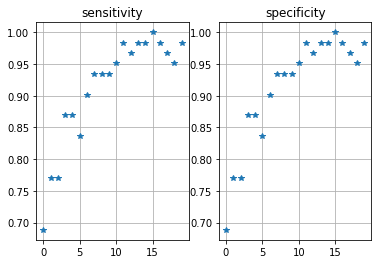

Text(0.5, 1.0, 'Accuracy')

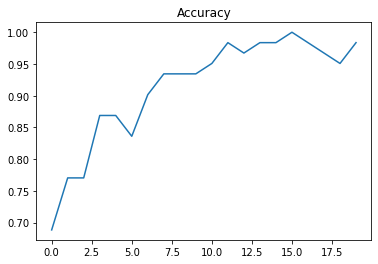

In [ ]:
tp=np.array(history.history['true_positives'])
fn=np.array(history.history['false_negatives'])
tn=np.array(history.history['true_negatives'])
fp=np.array(history.history['false_positives'])

sensitivity=np.divide(tp,np.add(tp,fn))
specificity=np.divide(tn,np.add(tn,fp))
false_positive_rate=np.divide(fp,np.add(tn,fp))

print('Accuracy: ', np.array(history.history['accuracy']))
print('sensitivity: ', sensitivity)
print('specificity: ', specificity)
print('false_positive_rate: ', false_positive_rate)

plt.subplot(1, 2, 1)
plt.plot(sensitivity,'*')
#plt.scatter(sensitivity)
plt.title('sensitivity')

plt.grid()

plt.subplot(1, 2, 2)
plt.plot(specificity, '*')
#plt.scatter(specificity)
plt.title('specificity')

plt.grid()

plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')

In [ ]:
## TEST ##
path=input('Enter the path of the Test File: ')
files=str(path)
raw = mne.io.read_raw_edf(files, verbose=False)
channel_data=raw.get_data()

Enter the path of the Test File: /content/drive/MyDrive/TUH data/01_tcp_ar/000/00000006/s002_2002_10_21/00000006_s002_t000.edf


In [ ]:
sh=channel_data.shape[0]
s=(sh, sh)
pcc2=np.zeros(s)
ch_ls=[]
print('shape of the channel_data: ', sh)
for x in range(0, sh):
  ch_ls.append(channel_data[x])

#print(ch_ls)
pcc_test=np.corrcoef(ch_ls)
pcc_test=cv2.resize(pcc2, (32,32))

shape of the channel_data:  32


In [ ]:
print(pcc_test.shape)
pcc_test=pcc_test+1
pcc_test=np.expand_dims(pcc_test, axis=0)
pcc_test=np.expand_dims(pcc_test, axis=3)
print(pcc_test.shape)

(32, 32)
(1, 32, 32, 1)


In [ ]:
model.predict(pcc_test)

array([[0.30548242, 0.68509996]], dtype=float32)

In [ ]:
score=model.evaluate(x_test1, y_test1, verbose=1, batch_size=128)

print('Test Score', score[0])
print('Test Accuracy', score[1])

In [ ]:
import multiprocessing 
multiprocessing.cpu_count()

2